Action Performed!
Action Performed!
Action Performed!
Three

One

Action Performed!
Two

Six

Action Performed!
Three

One

Action Performed!
Three

Three

Action Performed!
Five

Six

Action Performed!
Three

Four

Action Performed!
One

Six

Action Performed!
One

Four

Action Performed!
Four

Five

Action Performed!
Four

Six

pattern 1
Action Performed!
Five

Two

Action Performed!
One

Four

Action Performed!
One

Six

Action Performed!
Three

Two

Action Performed!
Four

One

Action Performed!
Three

One

Action Performed!
Four

Four

Action Performed!
Two

Five

Action Performed!
Six

Three

Action Performed!
Three

Five

pattern 1
Action Performed!
Two

Two

Action Performed!
Five

Five

Action Performed!
Four

Four

Action Performed!
Two

Two

Action Performed!
Two

Six

Action Performed!
Three

Six

Action Performed!
One

Three

Action Performed!
One

Two

Action Performed!
Four

Six

Action Performed!
Four

One

pat

KeyboardInterrupt: 

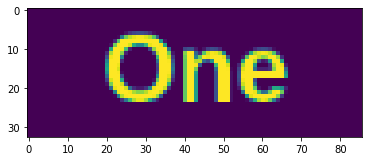

In [29]:
import pytesseract
import cv2
import time
import HelperFunc
from selenium import webdriver
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


driver = webdriver.Firefox()
driver.get("https://logigames.bet9ja.com/games.ls?page=launch&gameid=18000&skin=12&sid=&pff=1&tmp=1611946195")
time.sleep(5)
GAME_CANVAS = "layer2"
game_img = HelperFunc.getGameImage(driver, GAME_CANVAS)

### Press Continue
tmp =  HelperFunc.getTemplate("continue")
game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
coord  = HelperFunc.detectTemplate(game_image, tmp, False, -1)
HelperFunc.clickScreen(driver,coord[0] )

### Select Board
tmp =  HelperFunc.getTemplate("mid")
game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
coord  = HelperFunc.detectTemplate(game_image, tmp, False, -1)
HelperFunc.clickScreen(driver,coord[0] )
data_dict= {'first_dice':[],
            'second_dice': []}
count  = 0
batch = 1
while(1):
    if (count == 10):
        df =pd.DataFrame(data_dict)
        df.to_csv("Data/Pattern{}".format(batch))
        batch = batch + 1
        count = 0
        data_dict= {'first_dice':[],
                    'second_dice': []}
        print("Pattern {} Finished".format(batch))
    else:
        ### bet
        tmp =  HelperFunc.getTemplate("rebet")
        game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
        coord  = HelperFunc.detectTemplate(game_image, tmp, False, 3)
        HelperFunc.clickScreen(driver,(coord[0][0] + 50, coord[0][1] + 50) )
        time.sleep(10)
        game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
        plt.imshow(game_image)

        r1 = (1065, 188, 84, 35)
        r2  = (1160, 189, 86, 33)

        imCrop1 = game_image[int(r1[1]):int(r1[1]+r1[3]), int(r1[0]):int(r1[0]+r1[2])]
        plt.imshow(imCrop1)
        #cv2.imwrite('imgs/tests/im13.jpg', imCrop1)

        imCrop2 = game_image[int(r2[1]):int(r2[1]+r2[3]), int(r2[0]):int(r2[0]+r2[2])]
        plt.imshow(imCrop2)
        ### Preprocess Image
        thresh_image1 = thresholding(imCrop1)
        thresh_image2 = thresholding(imCrop2)

        img1 = np.abs(thresh_image1.astype( int) - 255)
        img2 = np.abs(thresh_image2.astype( int) - 255)

        img1 = np.array(img1).astype('uint8')
        img2 = np.array(img2).astype('uint8')
        
        ### Perform OCR
        custom_config = r'--oem 3 --psm 6'
        str1 = pytesseract.image_to_string(img1, config=custom_config)
        str2 = pytesseract.image_to_string(img2, config=custom_config)

        num1 = decodeString(str1.split('\n')[0])
        num2 = decodeString(str2.split('\n')[0])
        ### Save Numbers
        data_dict['first_dice'].append(num1)
        data_dict['second_dice'].append(num2)
        print(str1)
        print(str2)
        count = count + 1